## EXPLORATORY DATA ANALYSIS(EDA)
Exploratory Data Analysis (EDA) is a preliminary step in the data analysis process where data is visually and statistically examined to uncover patterns, relationships, anomalies, and insights. Through techniques such as visualization, summary statistics, and data structure examination, EDA aims to ensure a deep foundational understanding of the data. This process not only aids in data cleaning and preparation but also informs the selection of appropriate statistical tests or predictive models, helping analysts make informed decisions throughout subsequent stages of analysis.

#### Importing the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from IPython.display import display, Markdown

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Reading in the data
def load_and_preview_data(filepath):
    """Load the dataset and display the first few rows."""
    data = pd.read_csv(filepath)
    preview = data.head()
    return data, preview

# Load and preview the dataset
data, data_preview = load_and_preview_data("temporal_merged_data.csv")
data_preview


,Year,Country,Average_Temperature,Average_Rainfall,Item,Yield,Pesticides
0,1990,Ghana,26.73,1187.0,Cassava,84170,65.8
1,1990,Ghana,26.73,1187.0,Maize,11889,65.8
2,1990,Ghana,26.73,1187.0,Plantains and others,61890,65.8
3,1990,Ghana,26.73,1187.0,"Rice, paddy",16510,65.8
4,1990,Ghana,26.73,1187.0,Sorghum,6310,65.8


- Year: Represents the year of the data entry.
- Country: The country to which the data pertains, in this case, Ghana.
- Average_Temperature: The average temperature for the specified year.
- Average_Rainfall: The average rainfall for the specified year.
- Item: The type of agricultural item or crop.
- Yield: The yield of the specified item or crop.
- Pesticides: The amount of pesticides used.

In [4]:
def data_summary(df):
    """Provide a summary of the dataset's main characteristics."""
    # Describe the dataset to get summary statistics for numerical columns
    numerical_summary = df.describe()
    
    # Get the unique values for categorical columns
    country_unique_values = df['Country'].unique()
    item_unique_values = df['Item'].unique()
    
    return numerical_summary, country_unique_values, item_unique_values

# Get the data summary
numerical_summary, country_unique_values, item_unique_values = data_summary(data)
numerical_summary

,Year,Average_Temperature,Average_Rainfall,Yield,Pesticides
count,28248.000000,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,20.543722,1149.050816,77047.863282,37069.136973
std,7.052997,6.311828,709.736848,84950.194454,59954.787836
min,1990.000000,1.300000,51.000000,50.000000,0.040000
25%,1995.000000,16.710000,593.000000,19918.750000,1695.710000
50%,2001.000000,21.510000,1083.000000,38295.000000,17517.760000
75%,2008.000000,26.000000,1668.000000,104598.250000,48687.880000
max,2013.000000,30.650000,3240.000000,501412.000000,367778.000000


### Numerical Columns Summary:
1. Year:
  - Range: 1990 to 2013
  - Total Entries: 28,248
2. Average_Temperature:
  - Range: 1.3°C to 30.65°C
  - Mean: 20.54°C
3. Average_Rainfall:
  - Range: 51mm to 3,240mm
  - Mean: 1,149.05mm
4. Yield:
  - Range: 50 to 501,412
  - Mean: 77,047.86

**Note: The unit for yield is not specified in the provided data, but it's often measured in kilograms per hectare or similar units**
5. Pesticides:
  - Range: 0.04 to 367,778
  - Mean: 37,069.14
  
**Note: The unit for pesticides is not specified but could refer to the amount used in kilograms or liters**

#### Distribution plots

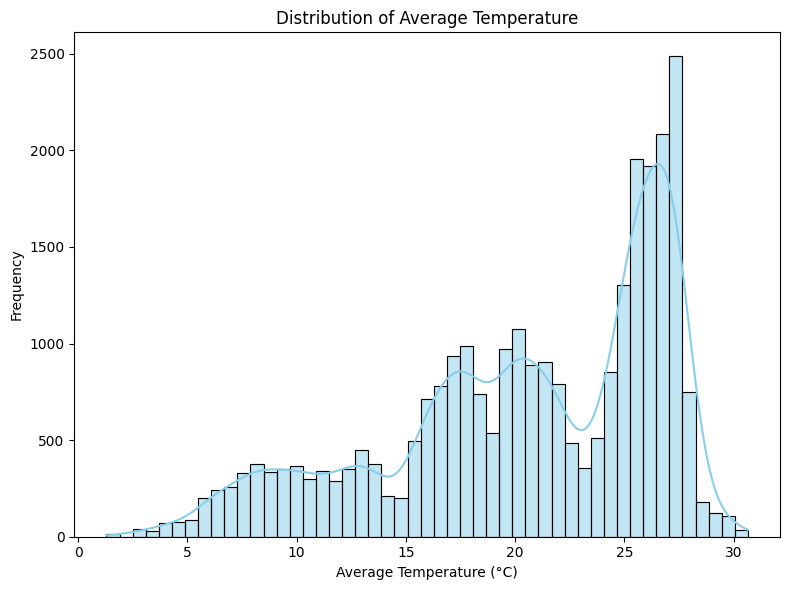

In [5]:
# Distribution of Average Temperature
def plot_temperature_distribution(df):
    """Plot histogram for Average Temperature."""
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Average_Temperature'], kde=True, color='skyblue')
    plt.title('Distribution of Average Temperature')
    plt.xlabel('Average Temperature (°C)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_temperature_distribution(data)


For the average temperature, the histogram shows a bimodal distribution. This suggests that the data may contain two distinct groups or periods with differing temperature patterns.
The majority of the temps are focused between 15°C and 30°C.

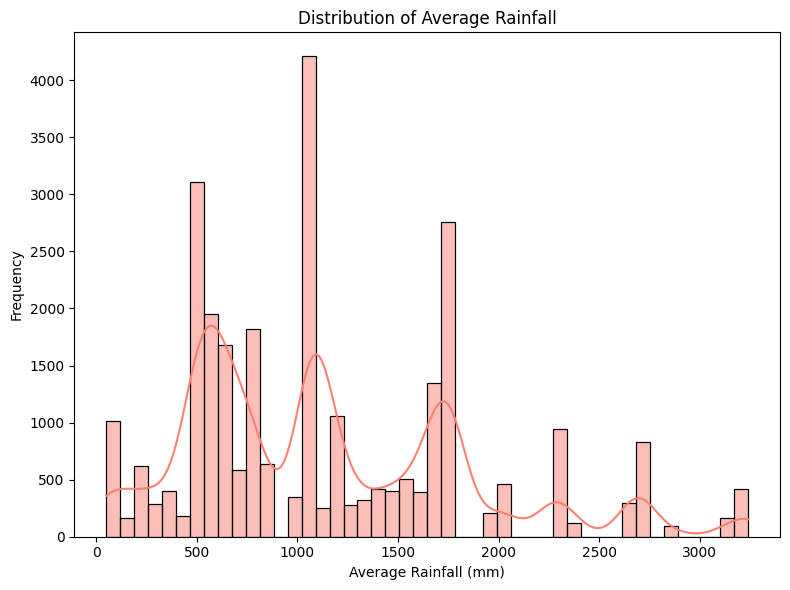

In [6]:
# Distribution of Average rainfall
def plot_rainfall_distribution(df):
    """Plot histogram for Average Rainfall."""
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Average_Rainfall'], kde=True, color='salmon')
    plt.title('Distribution of Average Rainfall')
    plt.xlabel('Average Rainfall (mm)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_rainfall_distribution(data)

- The data appears to be right-skewed, which suggests there are some years with exceptionally high rainfall amounts.
- A significant portion of the data lies in the range of approximately 500mm to 2,000mm of rainfall.

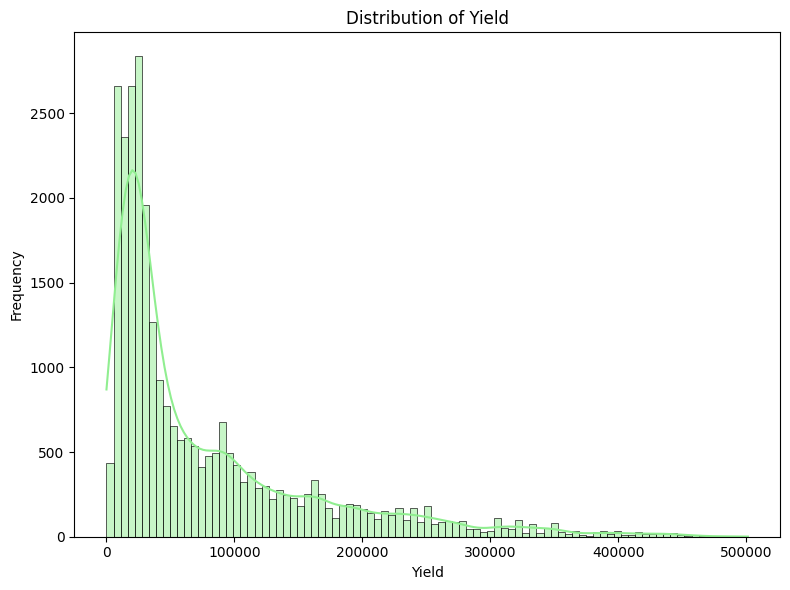

In [7]:
def plot_yield_distribution(df):
    """Plot histogram for Yield."""
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Yield'], kde=True, color='lightgreen')
    plt.title('Distribution of Yield')
    plt.xlabel('Yield')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_yield_distribution(data)


The distribution is right-skewed, indicating that while most crops have a yield in the lower range, there are some crops or instances with notably high yields.

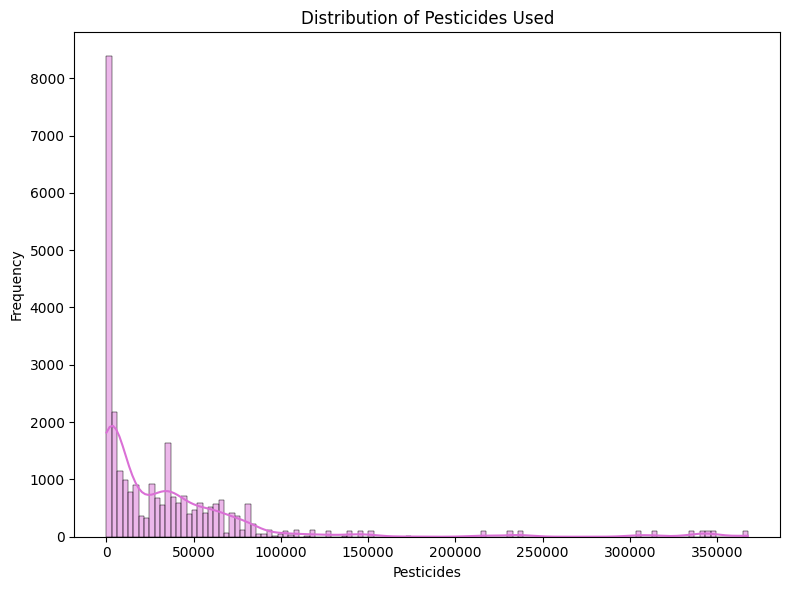

In [8]:
def plot_pesticides_distribution(df):
    """Plot histogram for Pesticides."""
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Pesticides'], kde=True, color='orchid')
    plt.title('Distribution of Pesticides Used')
    plt.xlabel('Pesticides')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_pesticides_distribution(data)


The distribution is highly right-skewed. This suggests that, for a majority of the data points, a relatively lower amount of pesticides is used. However, there are some instances where the usage of pesticides is significantly higher.

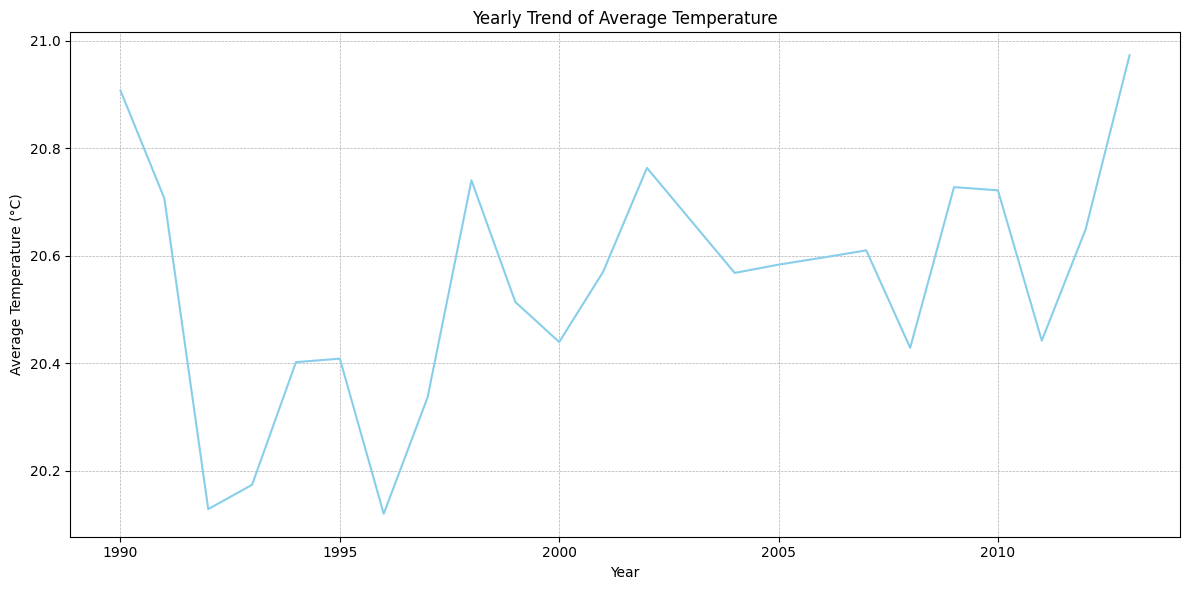

In [9]:
def plot_yearly_temperature_trend(df):
    """Plot the yearly trend of Average Temperature."""
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Year', y='Average_Temperature', estimator='mean', ci=None, color='skyblue')
    plt.title('Yearly Trend of Average Temperature')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature (°C)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

plot_yearly_temperature_trend(data)


- The line plot represents the mean average temperature for each year.
- We can observe a general fluctuating trend, but there doesn't seem to be a consistent increase or decrease over the years.
- There are certain years where the temperature has spiked or dipped, but overall, the temperature remains within a certain range.

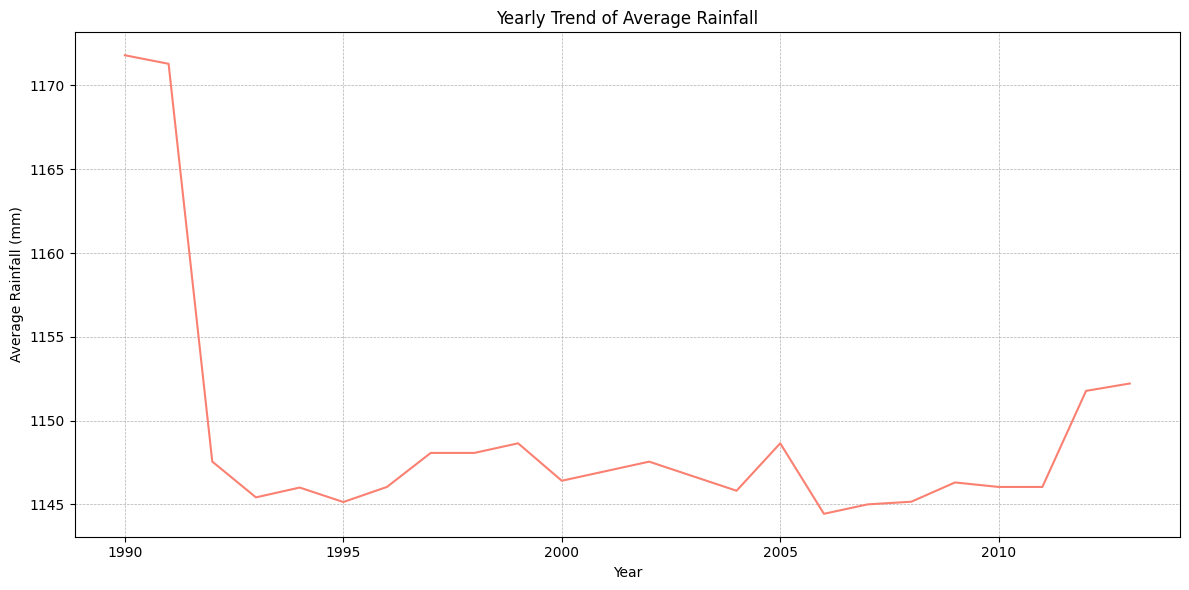

In [10]:
def plot_yearly_rainfall_trend(df):
    """Plot the yearly trend of Average Rainfall."""
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Year', y='Average_Rainfall', estimator='mean', ci=None, color='salmon')
    plt.title('Yearly Trend of Average Rainfall')
    plt.xlabel('Year')
    plt.ylabel('Average Rainfall (mm)')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

plot_yearly_rainfall_trend(data)


The line plot represents the mean average rainfall for each year.
The trend seems to have some fluctuations, with certain years experiencing higher average rainfall and others experiencing lower averages.
There isn't a consistent increase or decrease pattern over the years, but the data provides a clear temporal view of the rainfall patterns.

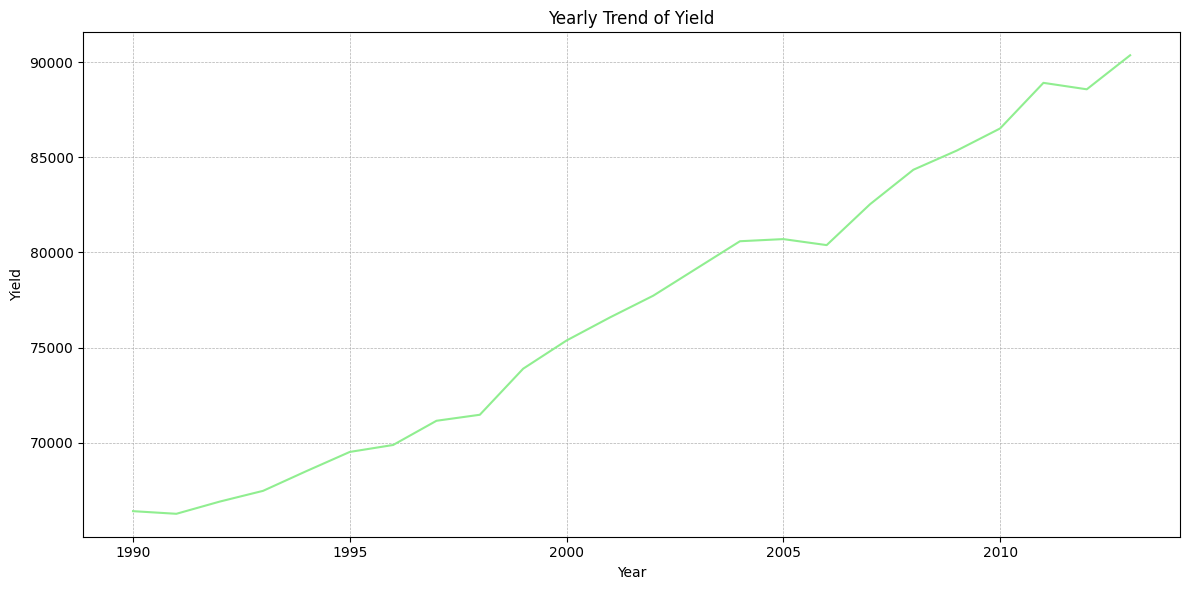

In [11]:
def plot_yearly_yield_trend(df):
    """Plot the yearly trend of Yield."""
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Year', y='Yield', estimator='mean', ci=None, color='lightgreen')
    plt.title('Yearly Trend of Yield')
    plt.xlabel('Year')
    plt.ylabel('Yield')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

plot_yearly_yield_trend(data)
